# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [315]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [316]:
df = pd.read_csv('/Users/mikeb/Documents/Flatiron/AD02/lab/dsc-course0-m8-lab/data/AviationData_Cleaned.csv', encoding='latin-1', low_memory=False)

In [317]:
df.shape


(18190, 27)

In [318]:
df.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date,Total.Passengers,Aircraft.destroyed,Make.Model
0,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,Incident,Minor,Airplane,9VSQQ,...,0.0,0.0,0.0,588.0,VMC,Taxi,04-12-2014,588.0,False,boeing -- 747
1,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,Fatal(1),Destroyed,Airplane,N9600W,...,1.0,1.0,0.0,0.0,IMC,Cruise,02-05-2011,2.0,True,piper -- pa-28-140
2,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,Fatal(1),NaN,Airplane,N927BA,...,1.0,0.0,0.0,4.0,VMC,Standing,17-10-2016,5.0,False,de havilland -- dhc-6
3,20001214X45013,Incident,CHI84IA041,1983-11-08,"CHICAGO, IL",United States,Incident,Minor,Airplane,N898AA,...,0.0,0.0,0.0,100.0,VMC,Taxi,11-06-2018,100.0,False,boeing -- 727-200
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,Non-Fatal,Substantial,Airplane,N1882D,...,0.0,0.0,0.0,1.0,VMC,Climb,05-05-2011,1.0,False,beech -- c35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20001206X02621,Accident,LAX95WA056,1994-11-18,"TRIPUI, MEXICO",Mexico,Non-Fatal,Substantial,Airplane,N71RJ,...,0.0,0.0,0.0,4.0,VMC,NaN,22-12-1994,4.0,False,piper -- pa-32r-300
96,20001206X02737,Accident,LAX95FA062,1994-12-27,"HOLTVILLE, CA",United States,Fatal(2),Destroyed,Airplane,N4647R,...,2.0,0.0,0.0,0.0,VMC,Go-around,17-08-2012,2.0,True,piper -- pa-28-140
97,20001206X02711,Accident,DCA95WA012,1994-12-29,"VAN, Turkey",Turkey,Fatal(54),Destroyed,Airplane,NaN,...,54.0,21.0,0.0,0.0,IMC,NaN,NaN,75.0,True,boeing -- 737-400
98,20001207X03179,Accident,NYC95LA070,1995-03-11,"WILMINGTON, OH",United States,Non-Fatal,Substantial,Airplane,N8395Y,...,0.0,0.0,0.0,2.0,VMC,Go-around,11-09-2012,2.0,False,piper -- pa-28rt-201


In [319]:
headers = df.columns.tolist()

for value in headers:
    print(value)

Event.Id
Investigation.Type
Accident.Number
Event.Date
Location
Country
Injury.Severity
Aircraft.damage
Aircraft.Category
Registration.Number
Make
Model
Amateur.Built
Number.of.Engines
Engine.Type
FAR.Description
Purpose.of.flight
Total.Fatal.Injuries
Total.Serious.Injuries
Total.Minor.Injuries
Total.Uninjured
Weather.Condition
Broad.phase.of.flight
Publication.Date
Total.Passengers
Aircraft.destroyed
Make.Model


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [320]:
# Broad.phase.of.flight

# Column to analyze
col_name = 'Total.Passengers'

# Count occurrences of each unique value sorted by the value
value_counts = df[col_name].value_counts().sort_index()

# sort by counts in descending order
#value_counts = df[col_name].value_counts().sort_values(ascending=False)

# Print each value and its count
for value, count in value_counts.items():
    print(f"{value}: {count}")

0.0: 797
1.0: 7521
2.0: 5641
3.0: 1475
4.0: 997
5.0: 310
6.0: 178
7.0: 115
8.0: 56
9.0: 54
10.0: 39
11.0: 14
12.0: 16
13.0: 17
14.0: 4
15.0: 6
16.0: 7
17.0: 5
18.0: 8
19.0: 1
20.0: 5
21.0: 3
22.0: 4
23.0: 3
24.0: 3
25.0: 2
26.0: 2
27.0: 5
28.0: 2
29.0: 2
30.0: 2
31.0: 2
32.0: 2
33.0: 4
34.0: 5
35.0: 2
36.0: 3
37.0: 5
38.0: 3
39.0: 6
40.0: 4
41.0: 5
43.0: 1
44.0: 3
45.0: 3
46.0: 3
47.0: 5
48.0: 5
49.0: 4
50.0: 5
51.0: 7
52.0: 6
53.0: 16
54.0: 3
55.0: 5
56.0: 3
57.0: 2
59.0: 2
61.0: 4
62.0: 2
63.0: 3
64.0: 4
65.0: 3
66.0: 6
67.0: 4
69.0: 2
70.0: 2
71.0: 2
72.0: 1
73.0: 5
74.0: 3
75.0: 3
76.0: 3
77.0: 4
78.0: 1
79.0: 2
80.0: 6
81.0: 4
82.0: 1
83.0: 2
84.0: 3
85.0: 2
86.0: 5
87.0: 2
88.0: 3
89.0: 1
90.0: 3
91.0: 3
92.0: 2
93.0: 2
94.0: 2
95.0: 2
96.0: 5
97.0: 2
98.0: 3
99.0: 5
100.0: 6
101.0: 5
102.0: 8
103.0: 4
104.0: 4
105.0: 1
106.0: 2
107.0: 3
108.0: 6
109.0: 3
110.0: 4
111.0: 3
112.0: 7
113.0: 6
114.0: 4
115.0: 5
116.0: 4
117.0: 3
118.0: 2
119.0: 6
120.0: 5
121.0: 5
122.0: 5
123.0: 4


In [321]:
# Create Size.Airplane using 20 or more passengers as threshold for "Large", else "Small"
df['Size.Airplane'] = np.where(df['Total.Passengers'] >= 20, 'Large','Small')

# Verify
print(df[['Total.Passengers', 'Size.Airplane']].head())

   Total.Passengers Size.Airplane
0             588.0         Large
1               2.0         Small
2               5.0         Small
3             100.0         Large
4               1.0         Small


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [322]:
# Create a combined fatal.serious.total injury column
df['Fatal.Serious.Total'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'])

# Aggregate totals by Size.Airplane and Make
size_make_totals = (df.groupby(['Size.Airplane', 'Make']).agg({'Total.Passengers': 'sum', 'Fatal.Serious.Total': 'sum'}).reset_index())

# Calculate fatal/serious percentage
size_make_totals['Fatal.Serious.Percentage'] = (size_make_totals['Fatal.Serious.Total'] / size_make_totals['Total.Passengers']) * 100

# # Select 15 lowest percentages per Size.Airplane
lowest_15 = (size_make_totals.sort_values(['Size.Airplane', 'Fatal.Serious.Percentage']).groupby('Size.Airplane').head(15).reset_index(drop=True))

# Check results
lowest_15


,Size.Airplane,Make,Total.Passengers,Fatal.Serious.Total,Fatal.Serious.Percentage
0,Large,cessna,179.0,0.0,0.000000
1,Large,dehavilland,58.0,0.0,0.000000
2,Large,grumman,69.0,0.0,0.000000
3,Large,learjet,50.0,0.0,0.000000
4,Large,piper,52.0,0.0,0.000000
5,Large,mcdonnell douglas,9340.0,68.0,0.728051
6,Large,bombardier,4183.0,110.0,2.629692
7,Large,boeing,93876.0,4424.0,4.712600
8,Large,airbus,26236.0,1844.0,7.028510
9,Large,embraer,5092.0,365.0,7.168107


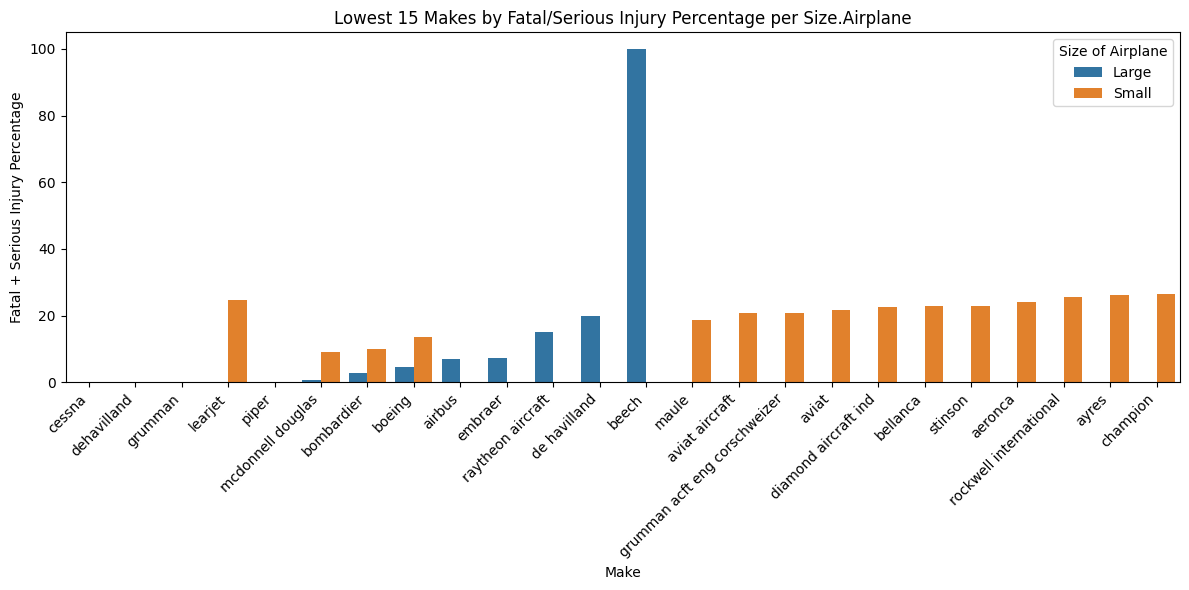

In [323]:
# Create figure
plt.figure(figsize=(12, 6))

# Side-by-side bar plot
sns.barplot(
    # data=lowest_15,
    data=lowest_15,
    x='Make',
    y='Fatal.Serious.Percentage',
    hue='Size.Airplane'
)

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fatal + Serious Injury Percentage')
plt.xlabel('Make')
plt.title('Lowest 15 Makes by Fatal/Serious Injury Percentage per Size.Airplane')
plt.legend(title='Size of Airplane')
plt.tight_layout()

plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

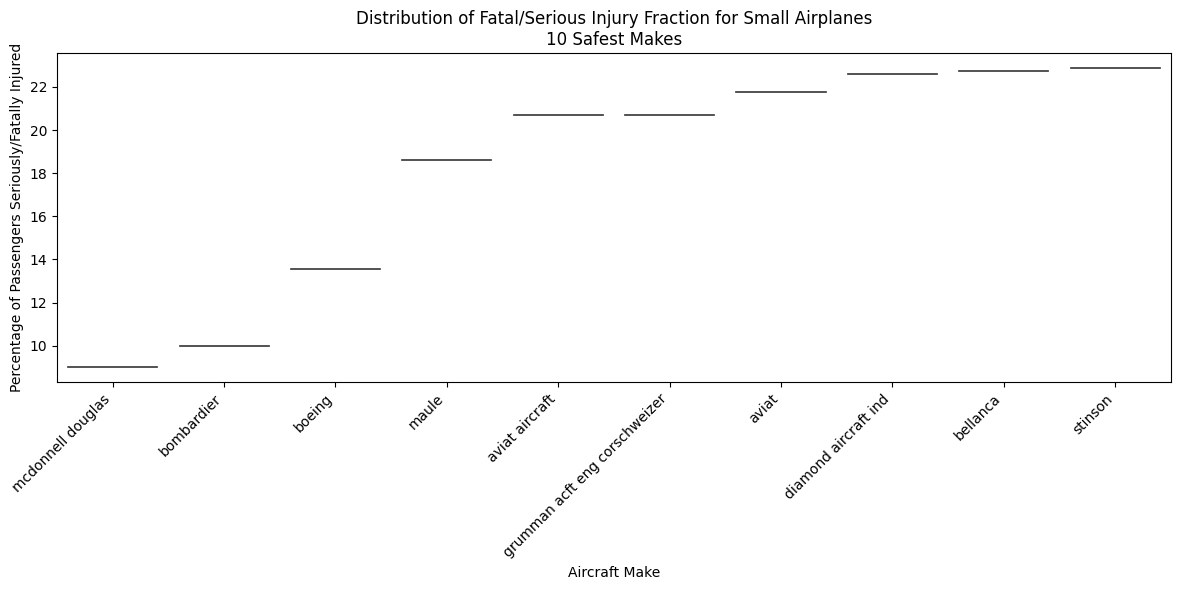

In [324]:
# Create new dataframe for Small airplanes.  Filter to the 10 with the lowest Fatal.Serious.Percentage
small_lowest_15 = lowest_15[lowest_15['Size.Airplane'] == 'Small'].copy()
small_lowest_10 = small_lowest_15.nsmallest(10, 'Fatal.Serious.Percentage').reset_index(drop=True)

# Plot violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=small_lowest_10,
    x='Make',
    y='Fatal.Serious.Percentage',
    hue='Make'
)

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
plt.xlabel('Aircraft Make')
plt.title('Distribution of Fatal/Serious Injury Fraction for Small Airplanes\n10 Safest Makes')
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

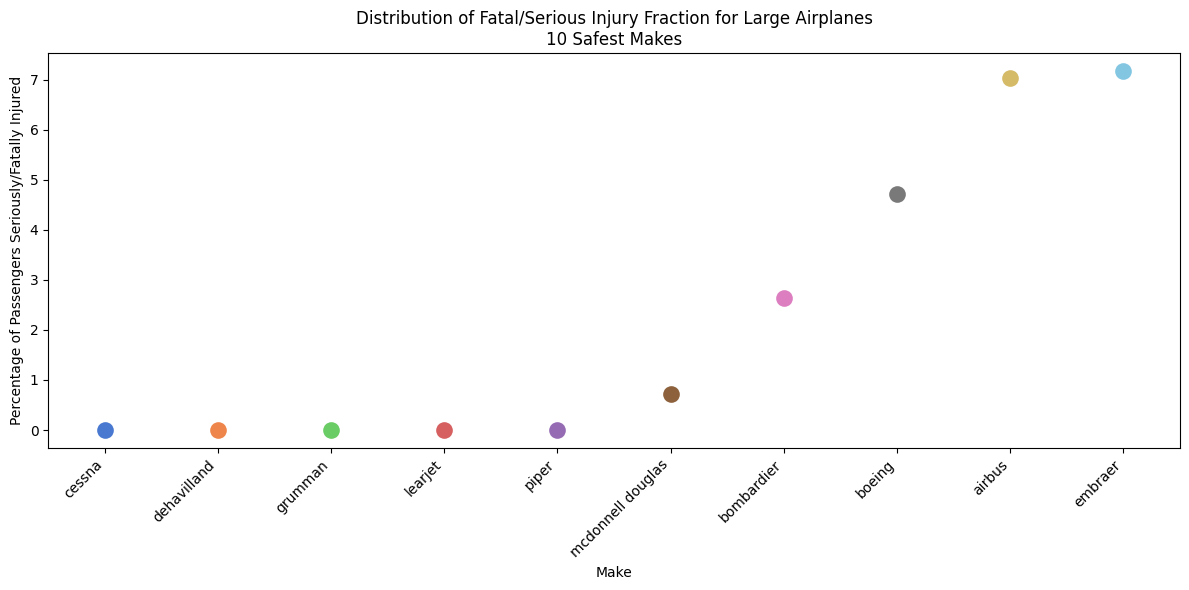

In [325]:
# Create new dataframe for Large airplanes.  Filter to the 10 with the lowest Fatal.Serious.Percentage
large_lowest_15 = lowest_15[lowest_15['Size.Airplane'] == 'Large'].copy()
large_lowest_10 = large_lowest_15.nsmallest(10, 'Fatal.Serious.Percentage').reset_index(drop=True)

# Plot stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=large_lowest_10,
    x='Make',
    y='Fatal.Serious.Percentage',
    # size of markers
    size=12,        
    # color per make
    hue='Make',     
    palette='muted' 
)

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
plt.xlabel('Make')
plt.title('Distribution of Fatal/Serious Injury Fraction for Large Airplanes\n10 Safest Makes')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [326]:
# Group by Size.Airplane and Make, calculate count of total flights and total destroyed
destruction_rate = (df.groupby(['Size.Airplane', 'Make'])
                    .agg(Total_Flights=('Aircraft.destroyed', 'count'), Total_Destroyed=('Aircraft.destroyed', 'sum'))
                    .reset_index())

# Compute destruction percentage 
destruction_rate['Destruction_Rate'] = (destruction_rate['Total_Destroyed'] / destruction_rate['Total_Flights'])

# Sort and select the 15 lowest per Size.Airplane
lowest_15_destruction = (destruction_rate.sort_values(['Size.Airplane', 'Destruction_Rate']).groupby('Size.Airplane').head(15).reset_index(drop=True))

# Display results
lowest_15_destruction

,Size.Airplane,Make,Total_Flights,Total_Destroyed,Destruction_Rate
0,Large,cessna,2,0,0.000000
1,Large,dehavilland,2,0,0.000000
2,Large,grumman,1,0,0.000000
3,Large,learjet,1,0,0.000000
4,Large,piper,1,0,0.000000
5,Large,raytheon aircraft,1,0,0.000000
6,Large,bombardier,69,2,0.028986
7,Large,boeing,551,27,0.049002
8,Large,embraer,78,4,0.051282
9,Large,mcdonnell douglas,60,4,0.066667


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

**Recommendation for safest "Large" Airplanes (20 or more total people on the flight):**
- The 5x Manufacturers that have never had a Serious/Fatal injury are recommended makes.  These include:  **Cessna, Dehavilland, Grumman, Learjet, and Piper**.
- Additionally, while McDonnell Douglas had a non-zero number of Serious/Fatal injuries, these only accounted for 0.72% of their passengers.  The total passenger count for McDonnell Douglas was 9,340 whereas the other "Large" Makes did not have more than 179 total passengers.  Based on this, **McDonnell Douglas** is also recommended.

**Recommendation for safest "Small" Airplanes (less than 20 total people on the flight):**
- After filtering the data, there were no small manufacturers that had 0 Serious/Fatal injuries.  
- **McDonnell Douglas, Bombardier, and Boeing** had the three lowest percentages, and would all be recommended.  McDonnel Douglas would be the highest recommendation as it also had a low rate of serious/fatal injuries in the "Large" category.

Of note, Defining an Airplane.Type as "Small" if there are less than 20 passengers could bias the results.  It is possible that some of the planes we tagged as "Small" were in fact "Large", but had a low percentage of their seats filled.  


### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

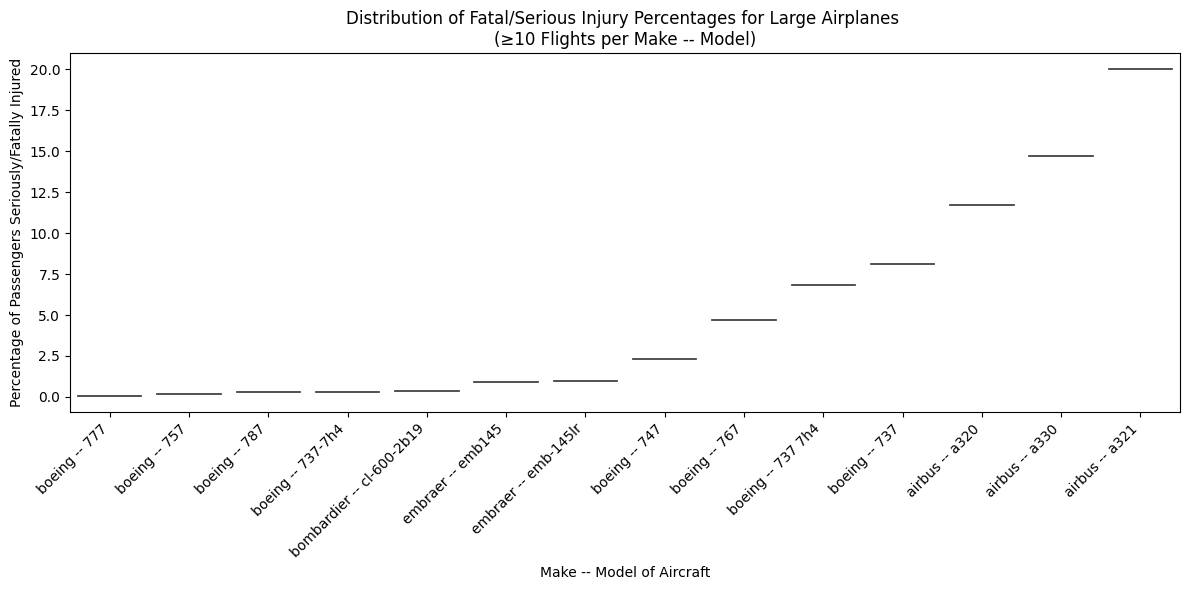

In [334]:
# filter to just large airplanes
df_large = df[df['Size.Airplane'] == 'Large'].copy()

# Compute per-accident fatal/serious fraction
df_large['Fatal_Serious_Percentage'] = ((df_large['Total.Fatal.Injuries'] + df_large['Total.Serious.Injuries']) / df_large['Total.Passengers'] * 100)

# Compute mean percentage per Make.Model
make_model_means = (df_large.groupby('Make.Model')['Fatal_Serious_Percentage'].mean().reset_index().rename(columns={'Fatal_Serious_Percentage': 'Mean_Fatal_Serious_Percentage'}))

# Calculate the count of Make.Models, filter to only Make.Models with ≥10 records
make_model_counts = df_large['Make.Model'].value_counts()
make_model_means = make_model_means[make_model_means['Make.Model'].isin(make_model_counts[make_model_counts >= 10].index)]

# Sort ascending by mean percentage
make_model_means = make_model_means.sort_values('Mean_Fatal_Serious_Percentage', ascending=True)
make_model_means

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=make_model_means,
    x='Make.Model',
    y='Mean_Fatal_Serious_Percentage',
    inner='quartile',
    palette='muted',
    hue='Make.Model'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
plt.xlabel('Make -- Model of Aircraft')
plt.title('Distribution of Fatal/Serious Injury Percentages for Large Airplanes \n(≥10 Flights per Make -- Model)')
plt.tight_layout()
plt.show()


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

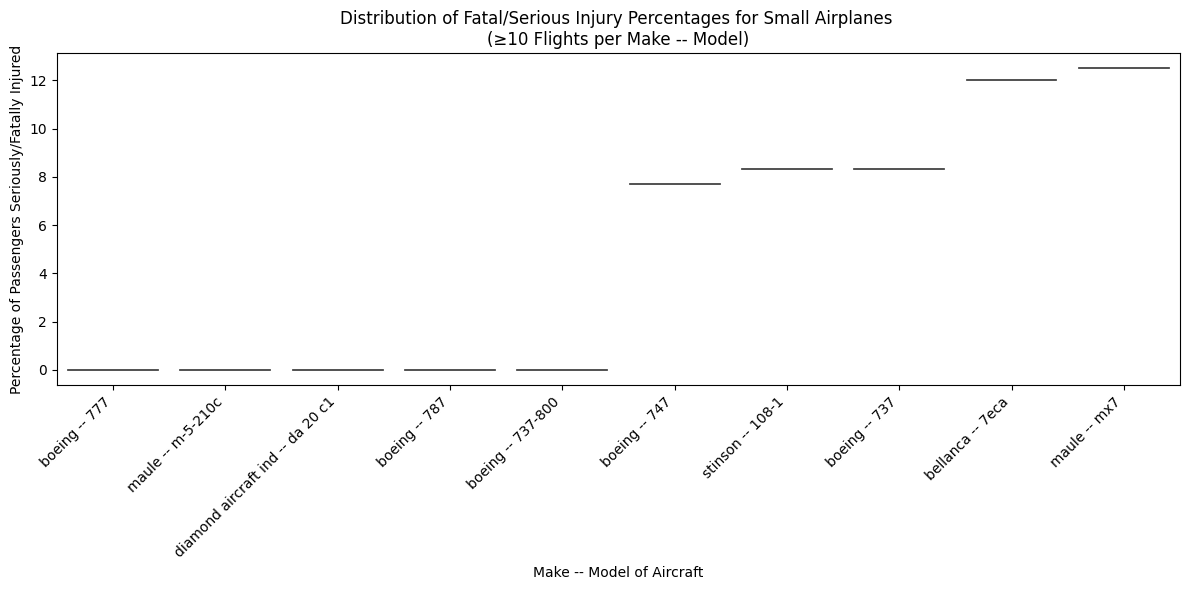

In [336]:
# filter to just small airplanes and where the MAke was in the 10 lowest percentages
df_small = df[df['Size.Airplane'] == 'Small'].copy()
df_small = df_small[df_small['Make'].isin(small_lowest_10['Make'])].copy()

# Compute per-accident fatal/serious fraction
df_small['Fatal_Serious_Percentage'] = ((df_small['Total.Fatal.Injuries'] + df_small['Total.Serious.Injuries']) / df_small['Total.Passengers'] * 100)

# Compute mean percentage per Make.Model
make_model_means = (df_small.groupby('Make.Model')['Fatal_Serious_Percentage'].mean().reset_index().rename(columns={'Fatal_Serious_Percentage': 'Mean_Fatal_Serious_Percentage'}))

# Calculate the count of Make.Models, filter to only Make.Models with ≥10 records
make_model_counts = df_small['Make.Model'].value_counts()
make_model_means = make_model_means[make_model_means['Make.Model'].isin(make_model_counts[make_model_counts >= 10].index)]

# Sort ascending by mean percentage
make_model_means = make_model_means.sort_values('Mean_Fatal_Serious_Percentage', ascending=True).head(10)
make_model_means

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=make_model_means,
    x='Make.Model',
    y='Mean_Fatal_Serious_Percentage',
    inner='quartile',
    palette='muted',
    hue='Make.Model'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
plt.xlabel('Make -- Model of Aircraft')
plt.title('Distribution of Fatal/Serious Injury Percentages for Small Airplanes \n(≥10 Flights per Make -- Model)')
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

**Recommendation for safest Make-Models of "Large" Airplanes (20 or more total people on the flight):**
-	We see that Boeing has 8 total models (out of 14 total) with low percentages of Serious/Fatal injuries.  The safest models appear to be the **Boeing 777, 757, 787, and 737-7h4** models, all with less than a -.33% Serious /Fatal injury rate.
-	**Bombardier’s cl-600-2b19 and Embraer’s emb145** are also recommended as they had less than a 1.0% Serious/Fatal injury rate.

**Recommendation for safest Make-Models of "Small" Airplanes (less than 20 total people on the flight):**
-	Of the 10 “Small” Make-Models with the lowest percentage of Serious/Fatal injuries, 5x had zero Serious Fatal injuries, and would all be recommended.  These include the **Boeing 777, Maule m-5-210c, Diamond Aircraft Ind - da 20 c1, Boeing 787, and Boeing 737-800**.


### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

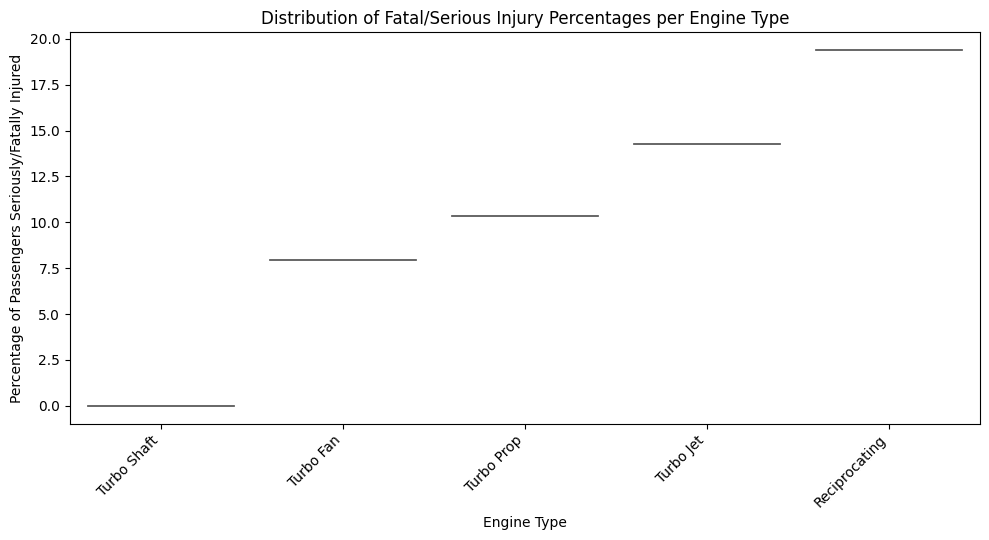

In [342]:
# ENGINE TYPE Analysis

# filter to where Engine Type is not NaN
df_engine = df[df['Engine.Type'].notna()].copy()

# Compute per-accident fatal/serious fraction
df_engine['Fatal_Serious_Percentage'] = ((df_engine['Total.Fatal.Injuries'] + df_engine['Total.Serious.Injuries']) / df_engine['Total.Passengers'] * 100)

# Compute mean percentage per Engine.Type
engine_type_means = (df_small.groupby('Engine.Type')['Fatal_Serious_Percentage'].mean().reset_index().rename(columns={'Fatal_Serious_Percentage': 'Mean_Fatal_Serious_Percentage'}))

# Calculate the count of Engine.Type
make_model_counts = df_small['Engine.Type'].value_counts()

# Sort ascending by mean percentage
engine_type_means = engine_type_means.sort_values('Mean_Fatal_Serious_Percentage', ascending=True).head(10)
engine_type_means

# Plot
plt.figure(figsize=(10, 5.5))
sns.violinplot(
    data=engine_type_means,
    x='Engine.Type',
    y='Mean_Fatal_Serious_Percentage',
    inner='quartile',
    palette='muted',
    hue='Engine.Type'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
plt.xlabel('Engine Type')
plt.title('Distribution of Fatal/Serious Injury Percentages per Engine Type')
plt.tight_layout()
plt.show()

**Recommendation for safest Aircraft based on their `Engine Type`**:
- **`Turbo Fan` would be the most recommended Engine Type** as it had the second lowest Serious/Fatal injury rate after the Turbo Shaft, but also had the 2nd most flight records of any Engine Type in the dataset.  
- While we see in our plot that the `Turbo Shaft` Engine Type has never been recorded to have had an accident, closer inspection reveals that our dataset only has one record with a Turbo Shaft engine, so this is not statistically significant.  



Engine Type

In [346]:
# PURPOSE OF FLIGHT Analysis

# filter to where Purpose of Flight is not NaN
df_engine = df[df['Purpose.of.flight'].notna()].copy()

# Compute per-accident fatal/serious fraction
df_engine['Fatal_Serious_Percentage'] = ((df_engine['Total.Fatal.Injuries'] + df_engine['Total.Serious.Injuries']) / df_engine['Total.Passengers'] * 100)

# Compute mean percentage per Purpose.of.flight
engine_type_means = (df_small.groupby('Purpose.of.flight')['Fatal_Serious_Percentage'].mean().reset_index().rename(columns={'Fatal_Serious_Percentage': 'Mean_Fatal_Serious_Percentage'}))

# Calculate the count of Purpose.of.flight
make_model_counts = df_small['Purpose.of.flight'].value_counts()

# # Sort ascending by mean percentage
engine_type_means = engine_type_means.sort_values('Mean_Fatal_Serious_Percentage', ascending=True).head(10)
engine_type_means

# # Plot
# plt.figure(figsize=(10, 5.5))
# sns.violinplot(
#     data=engine_type_means,
#     x='Purpose.of.flight',
#     y='Mean_Fatal_Serious_Percentage',
#     inner='quartile',
#     palette='muted',
#     hue='Purpose.of.flight'
# )

# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Percentage of Passengers Seriously/Fatally Injured')
# plt.xlabel('Purpose of Flight')
# plt.title('Distribution of Fatal/Serious Injury Percentages by Purpose of Flight')
# plt.tight_layout()
# plt.show()

,Purpose.of.flight,Mean_Fatal_Serious_Percentage
18,Skydiving,0.000000
6,Executive/corporate,0.000000
16,Public Aircraft - Local,0.000000
2,Aerial Observation,7.142857
13,Positioning,11.950113
10,Instructional,14.285714
12,Personal,18.959732
7,Ferry,20.000000
11,Other Work Use,20.192308
8,Flight Test,21.428571


**Recommendation for safest Aircraft based on the `Purpose of the Flight`:**
-	While we see in our plot that the `Skydiving`, `Public Aircraft – Local`, and `Executive/corporate` have never been recorded to have had an accident, closer inspection reveals that our dataset only has one record for the first two and two records for the third Purpose.  Based on the low number of records, these categories of Purpose cannot be recommended as they are not statistically significant.  
-	**`Aerial Observation` and `Positioning` would be the most recommended Purpose categories** as they have the next lowest Serious/Fatal injury rate.  
